Found 12102 images belonging to 2 classes.
Found 2964 images belonging to 2 classes.


C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\pc\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


378/378 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.5727 - loss: 0.8092 - val_accuracy: 0.6281 - val_loss: 0.6600
Epoch 2/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 120us/step - accuracy: 0.4688 - loss: 0.8329 - val_accuracy: 0.5000 - val_loss: 0.7477
Epoch 3/50


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


378/378 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.6632 - loss: 0.6243 - val_accuracy: 0.5357 - val_loss: 0.7665
Epoch 4/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 21us/step - accuracy: 0.5938 - loss: 0.7331 - val_accuracy: 0.7000 - val_loss: 0.5743
Epoch 5/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7067 - loss: 0.5528 - val_accuracy: 0.7969 - val_loss: 0.4191
Epoch 6/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.7500 - loss: 0.5574 - val_accuracy: 0.8500 - val_loss: 0.3674
Epoch 7/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 241371s 640s/step - accuracy: 0.7463 - loss: 0.5033 - val_accuracy: 0.8074 - val_loss: 0.4210
Epoch 8/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.6250 - loss: 0.5197 - val_accuracy: 0.9000 - val_loss: 0.4075
Epoch 9/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 24s 63ms/step - accuracy: 0.7765 - loss: 0.4586 - val_accuracy: 0.7755 - val_loss: 0.4415
Epoch 10/50
378/378 ━━━━━━━━━━━━━━━━━━━━ 0s 96us/step - accuracy: 0.7188 - loss: 0.4726 - val_accura

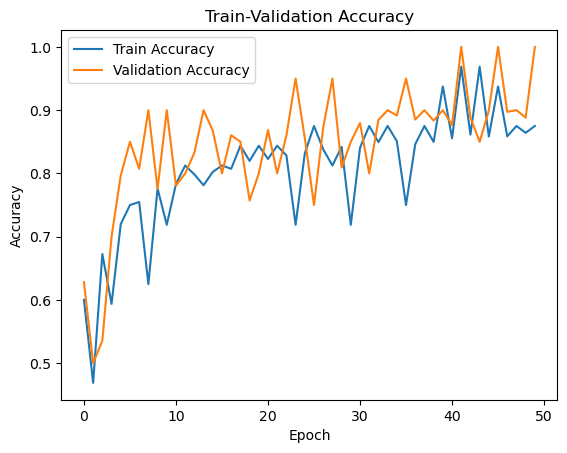

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import RMSprop

# Veri setini yükleme ve ön işleme
# Veri artırma için ImageDataGenerator nesnesi oluşturuluyor.
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Görüntü piksel değerlerini 0-1 aralığına yeniden ölçeklendirir.
    rotation_range=40,          # Rastgele döndürme açısı aralığı (derece cinsinden).
    width_shift_range=0.2,      # Rastgele genişlik kaydırma aralığı.
    height_shift_range=0.2,     # Rastgele yükseklik kaydırma aralığı.
    shear_range=0.2,            # Rastgele kesme aralığı.
    zoom_range=0.2,             # Rastgele yakınlaştırma aralığı.
    horizontal_flip=True       # Yatay simetri (ters çevirme) uygulama.
)

# Doğrulama verileri için ImageDataGenerator nesnesi oluşturuluyor.
validation_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim veri setini yüklemek için flow_from_directory kullanılıyor.
train_generator = train_datagen.flow_from_directory(
    'train',                    # eğitim veri seti dizini
    target_size=(48, 48),       # Görüntülerin hedef boyutu
    batch_size=32,              # Her adımda üretilen veri yığını boyutu
    class_mode='binary', 
    color_mode='grayscale'     # Gri ölçekte (tek kanallı) görüntüler
)

# Doğrulama veri setini yüklemek için flow_from_directory kullanılıyor.
validation_generator = validation_datagen.flow_from_directory(
    'validation',               # doğrulama veri seti dizini
    target_size=(48, 48),       # Görüntülerin hedef boyutu
    batch_size=32,              # Her adımda üretilen veri yığını boyutu
    class_mode='binary',
    color_mode='grayscale'     # Gri ölçekte (tek kanallı) görüntüler
)

# CNN modeli oluşturma
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid') # Sigmoid aktivasyon fonksiyonu çıkış katmanında kullanılıyor
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# Modeli eğitme
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

# Eğitim ve doğrulama doğruluklarını çizdirme
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train-Validation Accuracy')
plt.show()